# Анализ чатов когорты 16А

Задача: проанализировать сообщения нашей когорты в слаке за всё время обучения в Яндекс.Практикуме.

## Содержание
- [1. Подготовка данных](#1.-Подготовка-данных)
    - [1.1. Объединю данные из всех каналов;](#1.1.-Объединю-данные-из-всех-каналов;)
    - [1.2. Где необходимо, объединю каналы. Например, teamwork;](#1.2.-Где-необходимо,-объединю-каналы.-Например,-teamwork;)
    - [1.3. Приведу данные к соответствующим типам.](#1.3.-Приведу-данные-к-соответствующим-типам.)
- [2. Исследование пользователей](#2.-Исследование-пользователей)
    - [2.1. Составлю рейтинг из 10 пользователей, оставивших наибольшее количество сообщений](#2.1.-Составлю-рейтинг-из-10-пользователей,-оставивших-наибольшее-количество-сообщений.)
    - [2.2. Найду пользователей, которые чаще других создавали треды;](#2.2.-Найду-пользователей,-которые-чаще-других-создавали-треды;)
    - [2.3. Выясню, как меняется со временем количество пользователей, которые пишут сообщения — в том числе создают новые треды.](#2.3.-Выясню,-как-меняется-со-временем-количество-пользователей,-которые-пишут-сообщения-—-в-том-числе-создают-новые-треды.)
- [3. Исследование сообщений](#3.-Исследование-сообщений)
    - [3.1. Определю, какие каналы содержат больше всего тредов;](#3.1.-Определю,-какие-каналы-содержат-больше-всего-тредов;)
    - [3.2. Построю гистограмму распределения количества сообщений в тредах для каждого из каналов;](#3.2.-Построю-гистограмму-распределения-количества-сообщений-в-тредах-для-каждого-из-каналов;)
    - [3.3. Выясню, как меняется количество сообщений в тредах с течением времени;](#3.3.-Выясню,-как-меняется-количество-сообщений-в-тредах-с-течением-времени;)
    - [3.4. Найду треды, собравшие наибольшее количество сообщений;](#3.4.-Найду-треды,-собравшие-наибольшее-количество-сообщений;)
    - [3.5. Проанализирую изменение средней длины сообщения в зависимости от канала;](#3.5.-Проанализирую-изменение-средней-длины-сообщения-в-зависимости-от-канала;)
    - [3.6. Определю пользователей, которые в среднем пишут самые длинные сообщения.](#3.6.-Определю-пользователей,-которые-в-среднем-пишут-самые-длинные-сообщения.)
- [4. Исследование каналов](#4.-Исследование-каналов)
    - [4.1. Выявлю каналы с наибольшим количеством сообщений;](#4.1.-Выявлю-каналы-с-наибольшим-количеством-сообщений;)
    - [4.2. Рассчитаю среднее количество сообщений на тред в каждом канале. Определю лидеров;](#4.2.-Рассчитаю-среднее-количество-сообщений-на-тред-в-каждом-канале.-Определю-лидеров;)
    - [4.3. Исследую динамику создания сообщений в каждом из каналов.](#4.3.-Исследую-динамику-создания-сообщений-в-каждом-из-каналов.)
- [5. Общий вывод](#5.-Общий-вывод)

### Структура файлов (13 шт.):

- `thread_ts` — идентификатор треда. Если идентификатор отсутствует, тред состоит из одного сообщения;  
- `ts` — идентификатор сообщения в треде, а также дата и время в формате Unix Epoch;  
- `user` — идентификатор пользователя;  
- `text` — текст сообщения;
- `reactions` — реакции на сообщение;
- `real_name` — имя пользователя.

Столбец reactions хранит список словарей, в котором каждый словарь содержит такую информацию:
- `name` — название реакции;
- `users` — идентификаторы пользователей, которые поставили реакции.

## 1. Подготовка данных

### 1.1. Объединю данные из всех каналов;

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# массив ссылок на исходные данные
chats = [
    "chats_analysis/da_16_exerciser_01.csv",
    "chats_analysis/da_16_exerciser_02.csv",
    "chats_analysis/da_16_info.csv",
    "chats_analysis/da_16_library.csv",
    "chats_analysis/da_16_projects_01.csv",
    "chats_analysis/da_16_projects_02.csv",
    "chats_analysis/da_16_projects_03.csv",
    "chats_analysis/da_16_teamwork.csv",
    "chats_analysis/da_16_teamwork_01_archive.csv",
    "chats_analysis/da_16_teamwork_02_archive.csv",
    "chats_analysis/da_16_teamwork_03_archive.csv",
    "chats_analysis/da_16_teamwork_04_archive.csv",
    "chats_analysis/da_16_teamwork_05_archive.csv"
]

In [3]:
chats_dict = {}
for chat in chats:
    _ch = pd.read_csv(chat)
    _ch['chat'] = chat
    chats_dict[chat] = _ch

df = chats_dict[chats[0]]
for chat in chats[1:]:
    df = pd.concat([df,chats_dict[chat]])
    
df.chat.value_counts()

chats_analysis/da_16_exerciser_01.csv           1660
chats_analysis/da_16_projects_03.csv            1624
chats_analysis/da_16_exerciser_02.csv           1288
chats_analysis/da_16_projects_01.csv            1212
chats_analysis/da_16_projects_02.csv            1186
chats_analysis/da_16_teamwork.csv                587
chats_analysis/da_16_info.csv                    581
chats_analysis/da_16_teamwork_01_archive.csv     138
chats_analysis/da_16_teamwork_05_archive.csv     129
chats_analysis/da_16_teamwork_04_archive.csv     112
chats_analysis/da_16_teamwork_03_archive.csv     101
chats_analysis/da_16_library.csv                  69
chats_analysis/da_16_teamwork_02_archive.csv      59
Name: chat, dtype: int64

In [4]:
# объединение индексов
df = df.reset_index(drop=True)

### 1.2. Где необходимо, объединю каналы. Например, teamwork;

In [5]:
def merge_chats(chat_name):
    """
    Объединение чатов по типам
    """
    if 'exerciser' in chat_name:
        return 'exerciser'
    elif 'projects' in chat_name:
        return 'projects'
    elif 'teamwork' in chat_name:
        return 'teamwork'
    elif 'info' in chat_name:
        return 'info'
    elif 'library' in chat_name:
        return 'library'
    return 'other'

In [6]:
df.chat = df.chat.apply(merge_chats)
df.chat.value_counts()

projects     4022
exerciser    2948
teamwork     1126
info          581
library        69
Name: chat, dtype: int64

### 1.3. Приведу данные к соответствующим типам.

Можно привести столбцы ts и thread_ts к временному типу, единицы - секунды:

In [7]:
# UTC+3
df.thread_ts = pd.to_datetime(df['thread_ts'], unit='s') + pd.to_timedelta('03:00:00')
df.ts = pd.to_datetime(df['ts'], unit='s') + pd.to_timedelta('03:00:00')

In [8]:
display(df.head())
df.info()

,thread_ts,ts,user,text,reactions,real_name,chat
0,2020-08-27 14:48:27.000200033,2020-08-27 14:48:27.000200033,U018MPUJE6N,Добро пожаловать в канал *#exerciser*. Здесь п...,"[{'name': 'ok_hand', 'users': ['U018MPUJE6N', ...",Валерия Проничева,exerciser
1,2020-08-27 14:48:27.000200033,2020-08-27 17:52:24.014699936,U01963FB2J3,Вот и началось обучение),"[{'name': 'wave', 'users': ['U018MPUJE6N', 'U0...",Игорь Ашин,exerciser
2,2020-08-27 14:48:27.000200033,2020-08-27 22:32:38.017100096,U019HNSPPJ9,Да. Надеюсь все мы успешно справимся с обучени...,"[{'name': 'muscle', 'users': ['U018MPUJE6N', '...",Екатерина Иванова,exerciser
3,NaT,2020-08-28 17:45:49.026000023,U018MPUJE6N,"Друзья, часть из вас переместилась из da_16_ex...","[{'name': '+1', 'users': ['U019LRXL6QJ'], 'cou...",Валерия Проничева,exerciser
4,2020-08-27 14:48:27.000200033,2020-08-29 18:30:56.028100014,U019M1YDLCB,Всем нам удачи! Чтоб с первого раза успешно пр...,"[{'name': 'all_the_things', 'users': ['U01963F...",Svetlana Bayandina,exerciser


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8746 entries, 0 to 8745
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   thread_ts  8024 non-null   datetime64[ns]
 1   ts         8746 non-null   datetime64[ns]
 2   user       8746 non-null   object        
 3   text       8711 non-null   object        
 4   reactions  1560 non-null   object        
 5   real_name  8746 non-null   object        
 6   chat       8746 non-null   object        
dtypes: datetime64[ns](2), object(5)
memory usage: 478.4+ KB


## 2. Исследование пользователей

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8746 entries, 0 to 8745
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   thread_ts  8024 non-null   datetime64[ns]
 1   ts         8746 non-null   datetime64[ns]
 2   user       8746 non-null   object        
 3   text       8711 non-null   object        
 4   reactions  1560 non-null   object        
 5   real_name  8746 non-null   object        
 6   chat       8746 non-null   object        
dtypes: datetime64[ns](2), object(5)
memory usage: 478.4+ KB


В этой части исследования очистите датасет от пользователей из команды Практикума — кураторов, наставников, преподавателей.

In [10]:
praktikum_team = ['Валерия Проничева',
                    'Артем Рябцев',
                    'Gleb Mikhaylov / Глеб Михайлов',
                    'Александр Касаткин',
                    'Анна Осина',
                    'Юлия Соловьева',
                    'Александра Тарасова',
                  'Ольга Матушевич'
                 ]

In [11]:
# удаляю, но сначала проверю, что имена написаны верно и от этих пользоватлей есть сообщения:
for vip in praktikum_team:
    print('{}: {} сообщений,'.format(vip, df[df.real_name == vip].shape[0]))

Валерия Проничева: 1251 сообщений,
Артем Рябцев: 890 сообщений,
Gleb Mikhaylov / Глеб Михайлов: 107 сообщений,
Александр Касаткин: 177 сообщений,
Анна Осина: 719 сообщений,
Юлия Соловьева: 76 сообщений,
Александра Тарасова: 12 сообщений,
Ольга Матушевич: 439 сообщений,


### 2.1. Составлю рейтинг из 10 пользователей, оставивших наибольшее количество сообщений.

Выясню, в какие каналы они писали чаще всего;

In [12]:
top10 = df[~df.real_name.isin(praktikum_team)].real_name.value_counts().head(10).reset_index()

In [13]:
top10

,index,real_name
0,Максим Мандрик,249
1,Ekaterina,172
2,Екатерина Иванова,168
3,Диана Арутюнян,164
4,Юлия Соломатина,149
5,Мария Сигачева,143
6,Вера Сидорова,140
7,Павел Суминхо,130
8,Анна Берлова,130
9,Валерий Никонович,119


In [14]:
def plot_top10(data, x, y, title, xlabel, ylabel, figsize, **xticks):
    """
    Функция для построения графиков лучших пользователей, каналов и т.п.
    """
    _, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=x, y=y, data=data, color='tab:blue')
    plt.xticks(**xticks)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

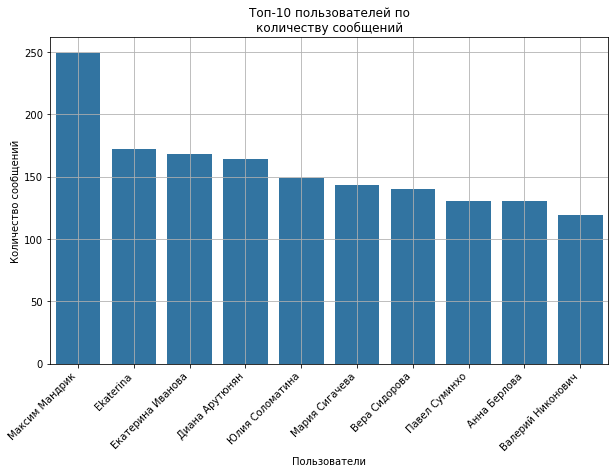

In [15]:
plot_top10(data=top10, x='index', y='real_name',
           title='Топ-10 пользователей по\nколичеству сообщений',
           xlabel='Пользователи',
           ylabel='Количество сообщений',
           figsize=(10,6),
           rotation=45, ha='right')

Вывод: Максим Мандрик - явный лидер по количеству сообщений, у него в сумме 250 сообщений, у следующего лидера уже меньше 180 (большой разрыв!)

В какие каналы эти пользователи писали чаще всего:

In [16]:
top10_list = top10['index'].tolist()
top10_chats = (df[df.real_name.isin(top10_list)]['chat']
              .value_counts()
              .reset_index())

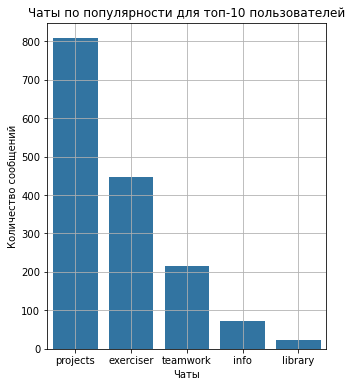

In [17]:
plot_top10(data=top10_chats, x='index', y='chat',
           title='Чаты по популярности для топ-10 пользователей',
           xlabel='Чаты',
           ylabel='Количество сообщений',
           figsize=(5,6))

Вывод: наибольшее количество вопросов возникало по самостоятельным проектам. Предсказуемый результат.

### 2.2. Найду пользователей, которые чаще других создавали треды;

Для создателей тредов верно утверждение, что время сообщения = времени треда.

In [18]:
# проверка на одном из сообщений, начинающего тред:
test = df[(df.real_name == 'Ксения Шарова')&(df.text.str.contains('нет в списке задач'))]
display(test)
test.ts == test.thread_ts

,thread_ts,ts,user,text,reactions,real_name,chat
2895,2021-01-26 17:29:35.015399933,2021-01-26 17:29:35.015399933,U016TPKGNF3,"<@USWMKAJHW>, привет! мне нужна помощь в теме ...",NaN,Ксения Шарова,exerciser


2895    True
dtype: bool

In [19]:
# доп. столбец для тредов
df['is_thread'] = ~pd.isnull(df.thread_ts)

# доп. столбец для первых сообщений тредов
df['is_thread_start'] = (df.ts == df.thread_ts)

In [20]:
top10_thread_starters = df[(~df.real_name.isin(praktikum_team))&(df.is_thread_start)]['real_name'].value_counts().head(10).reset_index()

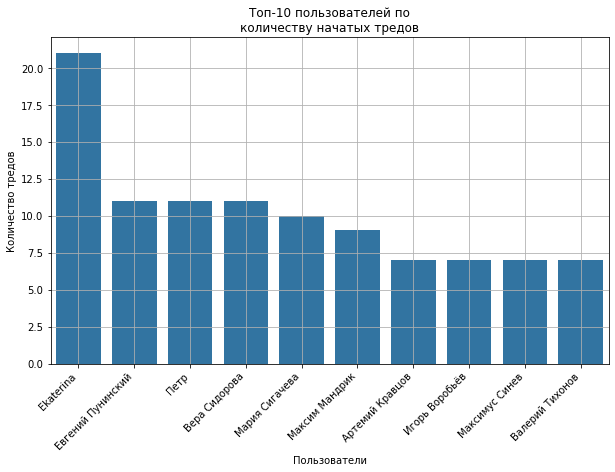

In [21]:
plot_top10(data=top10_thread_starters, x='index', y='real_name',
           title='Топ-10 пользователей по\nколичеству начатых тредов',
           xlabel='Пользователи',
           ylabel='Количество тредов',
           figsize=(10,6),
           rotation=45, ha='right')

Вывод: здесь (по количеству начатых тредов) лидирует `Ekaterina`, с почти двухкрастным отрывом от других пользователей.

### 2.3. Выясню, как меняется со временем количество пользователей, которые пишут сообщения — в том числе создают новые треды.

In [22]:
# доп. столбец для отображения данных по дням
df = df.sort_values(by='ts', ascending=True)
df['ts_days'] = df.ts.dt.strftime('%Y-%m-%d')

In [23]:
df_days_stat = df[~df.real_name.isin(praktikum_team)].groupby(['ts_days','is_thread_start'])['ts'].count().reset_index().rename({'ts':'count'}, axis=1)
df_days_stat.head()

,ts_days,is_thread_start,count
0,2020-08-27,False,70
1,2020-08-27,True,2
2,2020-08-28,False,22
3,2020-08-28,True,2
4,2020-08-29,False,14


In [24]:
num_days = (df.ts.max() - df.ts.min()).days + 1
base = pd.to_datetime(df.ts_days.min())

# список всех дней без пропусков
date_list = [base + datetime.timedelta(days=x) for x in range(num_days)]
date_list = pd.Series(date_list, name='date').dt.strftime('%Y-%m-%d').to_frame()
# для каждой даты добавляю наличие и отсутствие треда (cross join)
is_thread = pd.DataFrame(data=[True, False], columns=['is_thread_'])
date_list = date_list.assign(foo=1).merge(is_thread.assign(foo=1)).drop('foo', 1)
df_days_stat = date_list.merge(df_days_stat, how='left', left_on=['date', 'is_thread_'], right_on=['ts_days', 'is_thread_start'])
df_days_stat = df_days_stat.sort_values(by='date', ascending=True)
# заполнение пропусков нулями для корректного отображения на графиках
df_days_stat['count'] = df_days_stat['count'].fillna(0)

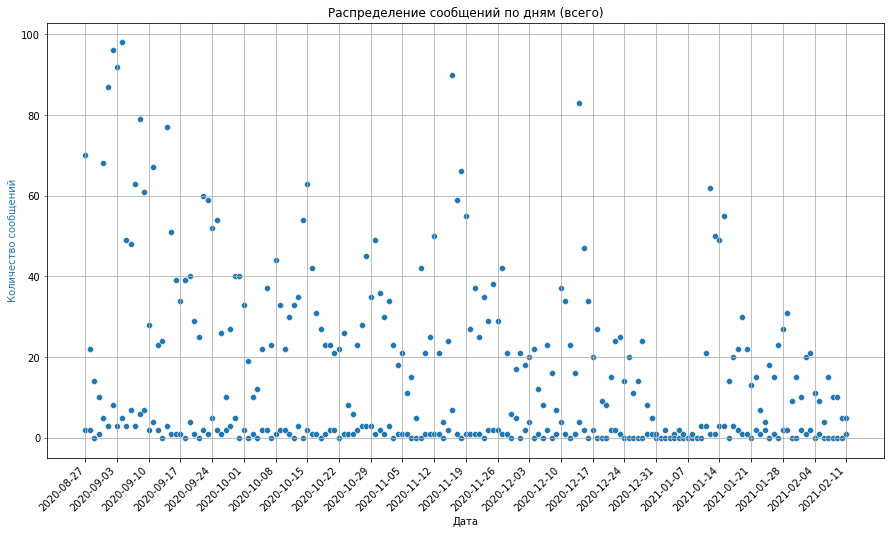

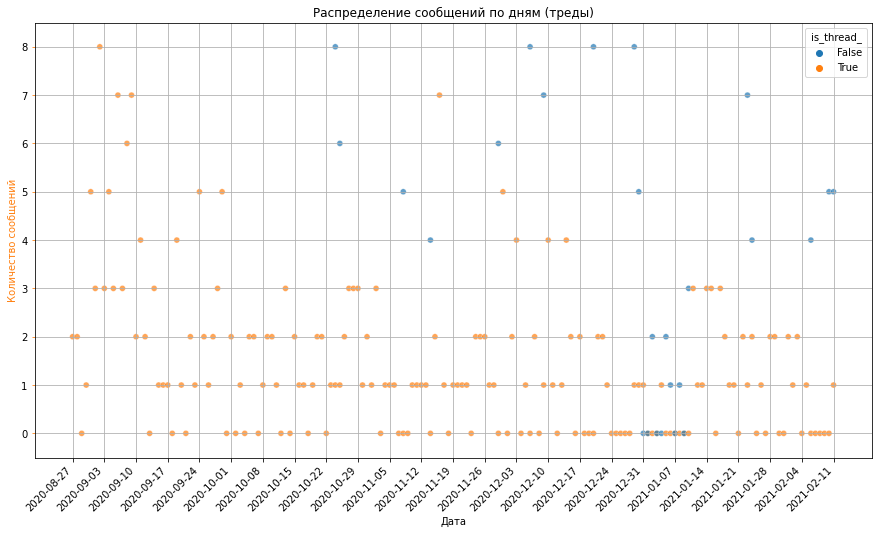

In [25]:
fig, ax = plt.subplots(figsize=(15,8))
colors = sns.color_palette()
sns.scatterplot(x='date', y='count', data=df_days_stat, color=colors[0], ax=ax)
plt.xticks(ticks=range(0, num_days, 7), rotation=45, ha='right')
plt.title('Распределение сообщений по дням (всего)')
plt.xlabel('Дата')
plt.ylabel('Количество сообщений', color=colors[0])
ax.tick_params(axis='y', color=colors[0])
plt.grid()

_, ax2 = plt.subplots(figsize=(15,8))
color = colors[2]
sns.scatterplot(x='date', y='count', hue='is_thread_', alpha=0.7, data=df_days_stat, color=colors[1], ax=ax2)
plt.xticks(ticks=range(0, num_days, 7), rotation=45, ha='right')
# сравнение с общим количеством:
# отмасштабирую по тредам:
y_max = df_days_stat[df_days_stat.is_thread_]['count'].max() + 0.5
plt.title('Распределение сообщений по дням (треды)')
plt.xlabel('Дата')
plt.ylabel('Количество сообщений', color=colors[1])
plt.ylim(-0.5,y_max)
ax2.tick_params(axis='y', color=colors[1])
plt.grid()
plt.show()

Количество сообщений совершенно нелинейно, много случайных факторов, и как правило, нет совершенно "нулевых" дней. Кроме новогодних праздников, когда активность закономерно приблизилась к нулю - отдыхать все хотят).  
Кроме того, видно, что самое большое количество новых тредов было создано за первые 2 недели (причём не сразу со старта, время на "раскачку" естественно). Это можно объяснить поначалу непривычным для многих использованием тредов - в мессенджерах такого нет, но в этом и преимущество слака.

## 3. Исследование сообщений

### 3.1. Определю, какие каналы содержат больше всего тредов;

In [26]:
# суммирую количество начальных сообщений в тредах
threads_stat = df.groupby('chat')['is_thread_start'].sum().sort_values(ascending=False).reset_index()

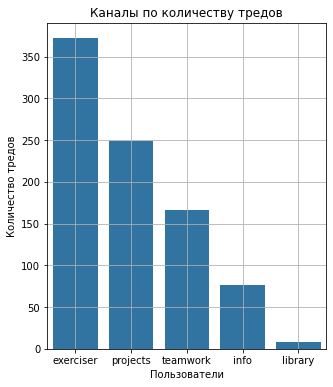

In [27]:
plot_top10(data=threads_stat, x='chat', y='is_thread_start',
           title='Каналы по количеству тредов',
           xlabel='Пользователи',
           ylabel='Количество тредов',
           figsize=(5,6))

Больше всего тредов создавалось в канале учебных заданий. Треды создавались по каждому пункту упражнений, коих было немало, гораздо больше, чем в проектах. Потом идёт канал неформального общения, видимо, студенты находили там для себя много интересных тем для обсуждения. Меньше всего тредов в `библиотеке` - в основном там оставляли реакции в виде смайлов.

### 3.2. Построю гистограмму распределения количества сообщений в тредах для каждого из каналов;

In [28]:
# Проверка количества начальных сообщений в тредах и в целом:
_c1 = df[(~pd.isnull(df.thread_ts))&(df.ts==df.thread_ts)]['ts'].count()
_c2 = df[(~pd.isnull(df.thread_ts))&(df.ts!=df.thread_ts)]['ts'].count()
print('Тредов: {}, сообщений в них: {}'.format(_c1, _c2))

Тредов: 872, сообщений в них: 7152


In [29]:
# Сообщения в тредах - это сообщения, у которых заполнено как ts, так и thread_ts свойства, но не обязательно совпадают:
threads_hist_stat = df[~pd.isnull(df.thread_ts)].groupby(['chat','thread_ts'])['ts'].count().rename('count').reset_index()

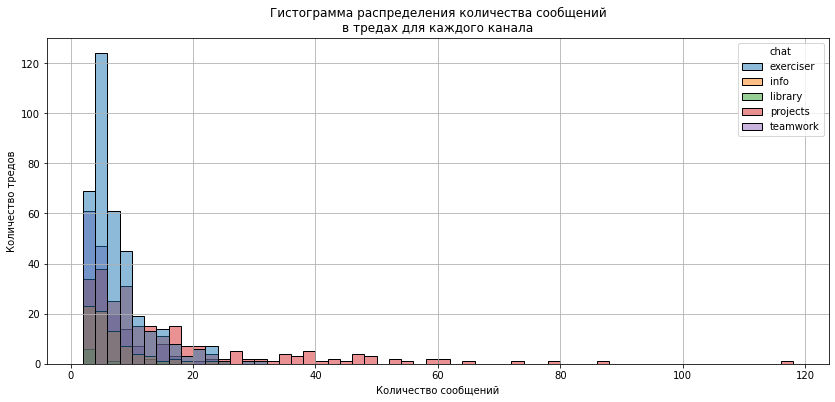

In [30]:
# общее распределение
fig, ax = plt.subplots(figsize=(14,6))
sns.histplot(data=threads_hist_stat, x='count', hue='chat', binwidth=2)
plt.title('Гистограмма распределения количества сообщений\nв тредах для каждого канала')
plt.xlabel('Количество сообщений')
plt.ylabel('Количество тредов')
plt.grid()
plt.show()

Не очень наглядно, разобью по каналам.

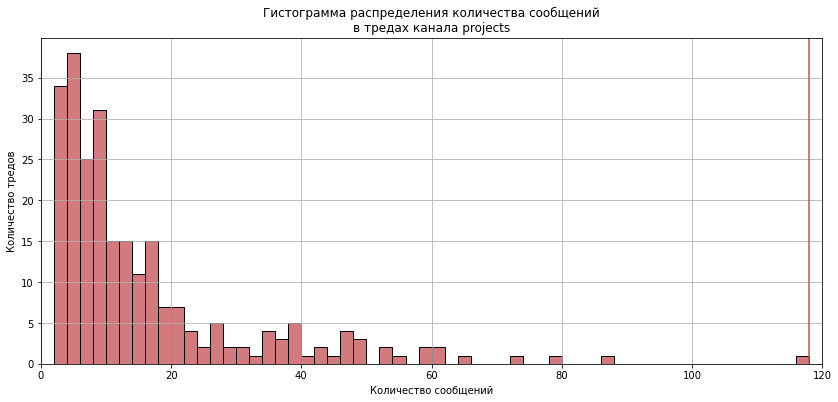

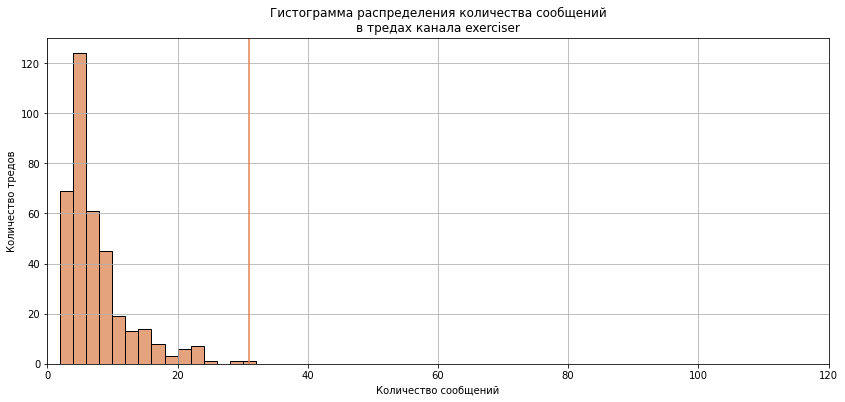

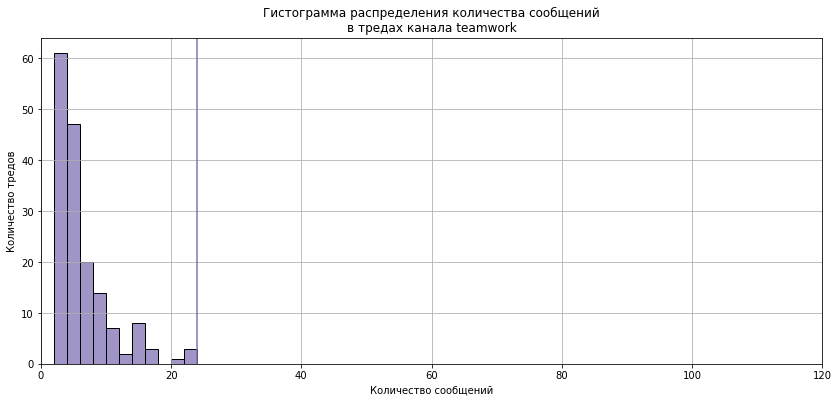

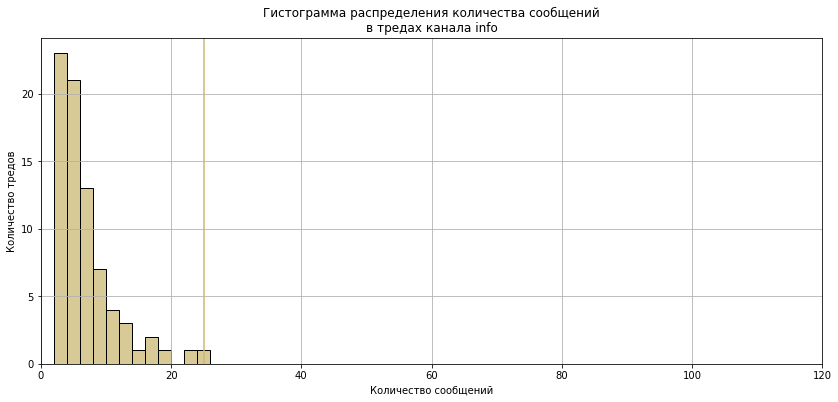

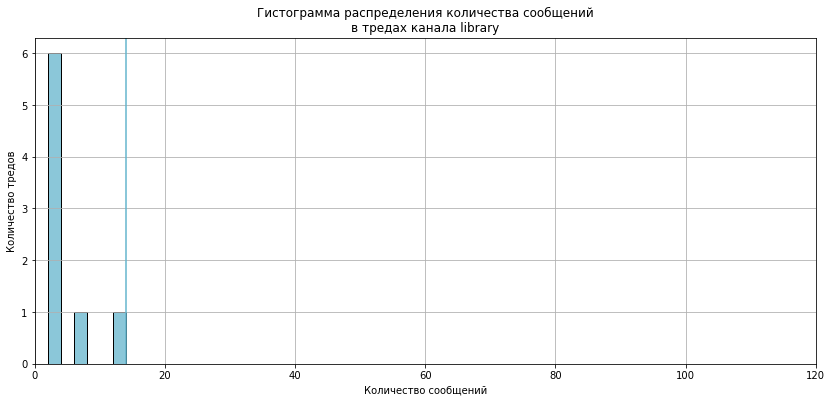

In [31]:
messages_max = threads_hist_stat['count'].max()+2
palette_swap = [3,1,4,8,9]

# сортировка чатов по количеству сообщений:
chats_in_order = threads_hist_stat.groupby('chat')['count'].sum().sort_values(ascending=False).index

for i, ch in enumerate(chats_in_order):
    fig, ax = plt.subplots(figsize=(14,6))
    sns.histplot(data=threads_hist_stat[threads_hist_stat.chat == ch],
                 x='count', binwidth=2, color=sns.color_palette('deep')[palette_swap[i]])
    plt.title('Гистограмма распределения количества сообщений\nв тредах канала ' + ch)
    plt.xlabel('Количество сообщений')
    plt.ylabel('Количество тредов')
    plt.xlim(0,messages_max)
#     максимум сообщений для треда в данном канале:
    _max = threads_hist_stat[threads_hist_stat.chat == ch]['count'].max()
    plt.axvline(_max, color=sns.color_palette('deep')[palette_swap[i]])
    plt.grid()
    plt.show()

Как видно, треды во всех каналах, кроме проектных, имеют довольно ровную гистограмму.  
Канал "Проекты" же, в отоличие ото всех других - имеет самое большое количество сообщений и отдельные треды, которые идут далеко впереди по числу сообщений. Похоже, там шли жаркие дискуссии по не простым задачам, подогреваемыми близкими дедлайнами.

Посмотрю, что за тред вызвал наибольший ажиотаж:

In [32]:
most_popular_thread = threads_hist_stat.sort_values(by='count', ascending=False).iloc[0,1]
df[(df['thread_ts'] == most_popular_thread)].sort_values(by='ts', ascending=True).iloc[0,:]['text']

':pushpin: Исследование надёжности заёмщиков\nШаг 2. Предобработка данных\n1. Определение и заполнение пропущенных значений'

Похоже, нас больше всего возмутил отрицательный стаж, ведь это полный абсурд).

### 3.3. Выясню, как меняется количество сообщений в тредах с течением времени;

Сгруппирую данные о количестве сообщений по тредам:

In [33]:
threads_timeline = df[~pd.isnull(df.thread_ts)].groupby('thread_ts')['ts'].count().rename('count').reset_index()
threads_timeline

,thread_ts,count
0,2020-08-27 14:43:05.000699997,7
1,2020-08-27 14:48:27.000200033,5
2,2020-08-27 14:49:02.000200033,8
3,2020-08-27 15:38:56.006799936,4
4,2020-08-27 23:50:39.049499989,2
...,...,...
867,2021-02-03 14:01:21.045900106,7
868,2021-02-04 17:46:03.051800013,2
869,2021-02-05 13:26:10.072900057,16
870,2021-02-08 19:29:05.063899994,16


In [34]:
threads_timeline['thread_ts_days'] = threads_timeline['thread_ts'].dt.date
first_day = threads_timeline.thread_ts_days.min()
threads_timeline['thread_day'] = (threads_timeline.thread_ts_days - first_day).dt.days
threads_timeline

,thread_ts,count,thread_ts_days,thread_day
0,2020-08-27 14:43:05.000699997,7,2020-08-27,0
1,2020-08-27 14:48:27.000200033,5,2020-08-27,0
2,2020-08-27 14:49:02.000200033,8,2020-08-27,0
3,2020-08-27 15:38:56.006799936,4,2020-08-27,0
4,2020-08-27 23:50:39.049499989,2,2020-08-27,0
...,...,...,...,...
867,2021-02-03 14:01:21.045900106,7,2021-02-03,160
868,2021-02-04 17:46:03.051800013,2,2021-02-04,161
869,2021-02-05 13:26:10.072900057,16,2021-02-05,162
870,2021-02-08 19:29:05.063899994,16,2021-02-08,165


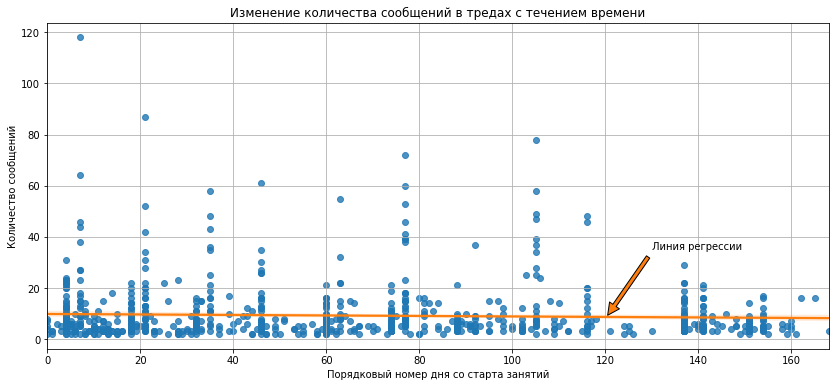

In [35]:
fig, ax = plt.subplots(figsize=(14,6))
sns.regplot(x='thread_day', y='count', data=threads_timeline, line_kws={'color': sns.color_palette()[1]})
plt.annotate('Линия регрессии',(120,8),xytext=(130,35), arrowprops=dict(facecolor=sns.color_palette()[1], shrink=0.05))
plt.title('Изменение количества сообщений в тредах с течением времени')
plt.xlabel('Порядковый номер дня со старта занятий')
plt.ylabel('Количество сообщений')
plt.grid()
plt.show()

Как видно, чем раньше создавался тред, тем больше среди них было тредов с относительно большим количеством сообщений, и чем позже - тем меньше. Но по среднему они практически не отличались.

### 3.4. Найду треды, собравшие наибольшее количество сообщений;

In [36]:
top10threads_count = (df[df.is_thread]
                     .groupby('thread_ts')['ts']
                     .count()
                     .sort_values(ascending=False)
                     .rename('messages')
                     .head(10)
                     .reset_index())

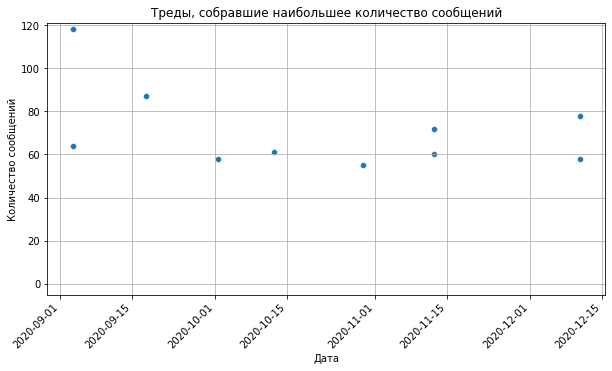

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='thread_ts', y='messages', data=top10threads_count)
plt.xticks(rotation=45, ha='right')
plt.title('Треды, собравшие наибольшее количество сообщений')
plt.xlabel('Дата')
plt.ylabel('Количество сообщений')
plt.grid()
ylim = plt.ylim()
plt.ylim(-5,ylim[1])
plt.show()

In [38]:
first_messages_top10threads = df[(df.thread_ts.isin(top10threads_count.thread_ts.tolist()))&(df.thread_ts == df.ts)]

top10threads_count

,thread_ts,messages
0,2020-09-03 10:58:17.034699917,118
1,2020-09-17 13:31:14.142100096,87
2,2020-12-10 16:33:16.448999882,78
3,2020-11-12 11:32:38.278500080,72
4,2020-09-03 10:58:26.025300026,64
5,2020-10-12 12:19:23.093400002,61
6,2020-11-12 11:32:33.188999891,60
7,2020-12-10 16:27:54.007699966,58
8,2020-10-01 12:36:04.060699940,58
9,2020-10-29 16:18:55.000400066,55


In [39]:
first_messages_top10threads = first_messages_top10threads.merge(top10threads_count, how='left', on='thread_ts').sort_values(by='messages', ascending=False)

pd.set_option('display.max_colwidth', 1000)

In [40]:
first_messages_top10threads[['real_name','chat','text','messages']]

,real_name,chat,text,messages
0,Валерия Проничева,projects,:pushpin: Исследование надёжности заёмщиков\nШаг 2. Предобработка данных\n1. Определение и заполнение пропущенных значений,118
2,Валерия Проничева,projects,:bar_chart: Исследование объявлений о продаже квартир\nШаг 2. Предобработка данных\n• *Исследование и заполнение пропусков в данных*\n,87
9,Артем Рябцев,projects,"Всем привет! В проекте есть вопрос\n```""Рынок заведений общественного питания"" - ""Воспользуйтесь внешними данными и ответьте - в каких районах Москвы находятся эти улицы""```\n\nВ данном треде я приведу инструкцию, как выполнить это задание наиболее интересно и полезно с практической точки зрения :slightly_smiling_face: Необязательно следовать именно этому пути, но этот способ даст наиболее точный результат и предоставит вам возможность попрактиковать навыки, полученные в спринте ""Сбор и хранение данных""",78
7,Валерия Проничева,projects,:pushpin: Анализ бизнес-показателей\nАналитика в Яндекс.Афише\n*Шаг 2. Постройте отчёты и посчитайте метрики. Маркетинг:*\n• *На сколько окупились расходы? (ROI)*\n,72
1,Валерия Проничева,projects,:pushpin: Исследование надёжности заёмщиков\nШаг 2. Предобработка данных\n1. Определение и заполнение пропущенных значений,64
4,Валерия Проничева,projects,:bar_chart: Сборный проект-1\n*Шаг 2.* Подготовьте данные\n• Обработайте пропуски при необходимости\n,61
6,Валерия Проничева,projects,:pushpin: Анализ бизнес-показателей\nАналитика в Яндекс.Афише\n*Шаг 2. Постройте отчёты и посчитайте метрики. Маркетинг:*\n• *На сколько окупились расходы? (ROI)*\n,60
3,Валерия Проничева,projects,":signal_strength: Определение тарифа для телеком компании\nШаг 2. Подготовка данных\n• *Подготовка пользовательских данных* (звонки, смс, объем трафика и т.д.)\n",58
8,Артем Рябцев,projects,"Всем привет! В проекте есть вопрос\n```""Рынок заведений общественного питания"" - ""Воспользуйтесь внешними данными и ответьте - в каких районах Москвы находятся эти улицы""```\nВ данном треде я приведу инструкцию, как выполнить это задание наиболее интересно и полезно с практической точки зрения :slightly_smiling_face: Необязательно следовать именно этому пути, но этот способ даст наиболее точный результат и предоставит вам возможность попрактиковать навыки, полученные в спринте ""Сбор и хранение данных""",58
5,Валерия Проничева,projects,*Сбор и хранение данных.* \n:pushpin: *Шаг 2. Исследовательский анализ данных*,55


Больше всего сообщений собрали треды от Валерии Проничевой и Артёма Рябцева в канале `проекты`.

### 3.5. Проанализирую изменение средней длины сообщения в зависимости от канала;

In [41]:
# заполняю пустые сообщения, почему-то такие попадаются. возможно, это картинки, которые не сохранились в логах
df.text = df.text.fillna('')

In [42]:
df['text_length'] = df['text'].apply(lambda x: len(x))

In [43]:
# сортировка чатов по длине сообщений:
chats_text_order = df.groupby('chat')['text_length'].median().sort_values(ascending=False).index.tolist()

In [44]:
# определение 99 перцентиля для сообщений для фильтрации
# для чата с наиболее длинными сообщениями:
chats_max_x = df[df.chat == chats_text_order[0]]['text_length'].quantile(0.99)

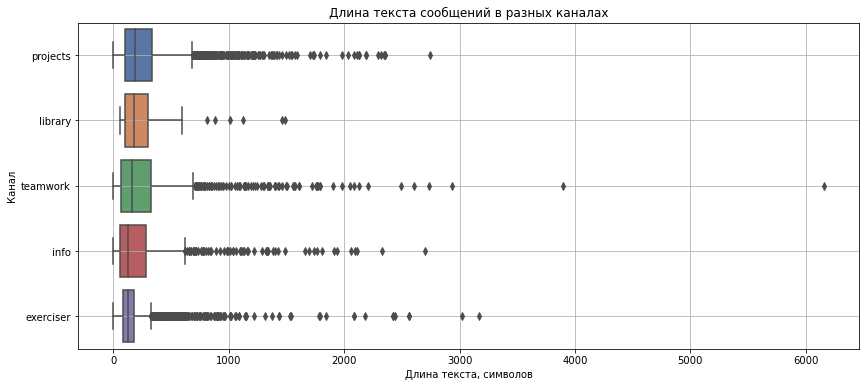

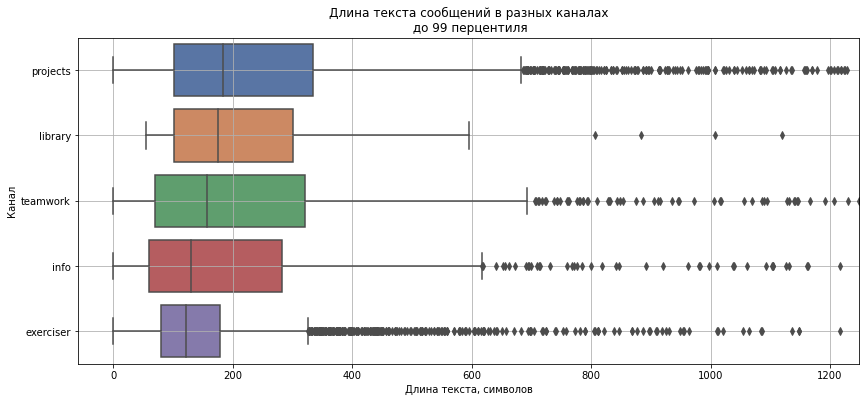

In [45]:
fig, ax = plt.subplots(figsize=(14,6))
sns.boxplot(y='chat', x='text_length', data=df, order=chats_text_order, palette=sns.color_palette('deep'))
plt.grid()
plt.title('Длина текста сообщений в разных каналах')
plt.xlabel('Длина текста, символов')
plt.ylabel('Канал')
xl = plt.xlim()
plt.show()
fig, ax = plt.subplots(figsize=(14,6))
sns.boxplot(y='chat', x='text_length', data=df, order=chats_text_order, palette=sns.color_palette('deep'))
plt.grid()
plt.title('Длина текста сообщений в разных каналах\n до 99 перцентиля')
plt.xlabel('Длина текста, символов')
plt.ylabel('Канал')
# выравнивание осей графиков
plt.xlim(xl[0] / (xl[1] / chats_max_x), chats_max_x)
plt.show()

В канале `teamwork` встречаются наиболее длинные сообщения - более чем в 2 раза превышающие сообщения в других каналах. Всё верно, "коротко и по существу" нужно писать в других каналах, тут можно расслабиться.
Однако `проекты` всё равно лидируют по медианной длине сообщения. Чтобы тебя поняли, приходится описывать всё подробно.

### 3.6. Определю пользователей, которые в среднем пишут самые длинные сообщения.

In [46]:
top10users_length = df.groupby('user').agg({'text_length':'median', 'real_name':'min'}).sort_values(by='text_length', ascending=False).head(10)

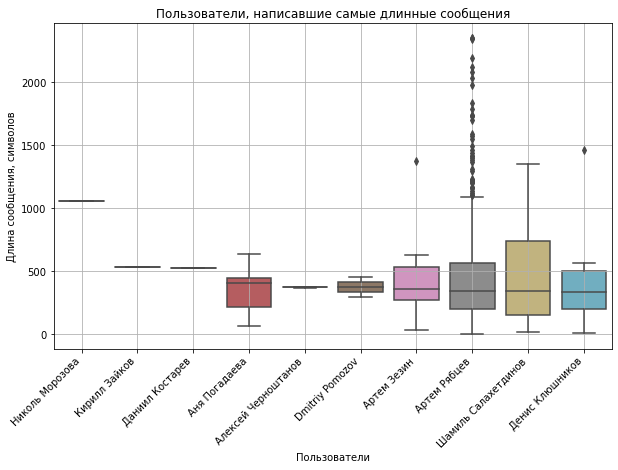

In [47]:
list_text_users = top10users_length.index.tolist()
list_text_names = top10users_length.real_name.tolist()
df_length_top = df[df.user.isin(list_text_users)]
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='real_name', y='text_length', data=df_length_top, order=list_text_names, palette=sns.color_palette('deep'))
plt.xticks(rotation=45, ha='right')
plt.title('Пользователи, написавшие самые длинные сообщения')
plt.xlabel('Пользователи')
plt.ylabel('Длина сообщения, символов')
plt.grid()
plt.show()

Похоже, самые активные написали всего по одному сообщению. Посмотрю, что это за сообщения:

In [48]:
df[df.user.isin(list_text_users[0:3])][['real_name','text']]

,real_name,text
8408,Даниил Костарев,"Всем привет! Меня зовут Даниил, мне 22 года, живу в Перми, но в данный момент перебираюсь в Москву. В этом году окончил университет (программа менеджмент:grin:) и пока что нахожусь в поиске работы. Во время обучения в университете понял, что душа лежит к решению различных аналитических задач. Курс по аналитике данных выбрал как раз по это причине). Сфера IT очень привлекает, поскольку с каждым годом она только растет. С помощью курса надеюсь освоить недостающие hard skills. Буду рад новым знакомствам и взаимной помощи)."
8364,Николь Морозова,"Всем привет! Я Николь, мне 25 годков. Я по профессии журналист, работаю редактором документального кино. Этим летом окончила магистратуру ВШЭ ""Журналистика данных"" – это когда журналисты учатся прогать и с помощью этого анализируют данные и делают исследования и расследования. В моем портфолио пока есть только одно такое – про алименты на детей <https://novayagazeta.ru/articles/2020/06/01/85644-alimenty-data>. Честно сказать, учили нас бестолково, поэтому как только я сдала диплом, записалась сюда.\n\n Я уже прошла первые два спринта (они замечательные и очень интересные) и ушла в академ на месяц – потому что выходила замуж и немножко отстала от своей когорты))\n\n<@U017YK5BZM3> Поздравляю! И ответственно заявляю, что это очень мудрое решение – сначала жениться, а потом начать учиться)) :rolling_on_the_floor_laughing::laugh-cheeky-monkey: И отмечу, что это прекрасно, когда на задание уходит много времени, но его все равно хочется и нравится делать. И что есть любимый синтаксис))\n\..."
8371,Кирилл Зайков,"Всем привет! Я Кирилл, мне 28 лет. Работаю преподавателем в одном из вузов Новосибирска.\nЯ преподаю статистику и ее различные отраслевые приложения. Соответственно, сфера моих научных интересов лежит в области анализа реальных данных о социально-экономических объектах и системах.\nДавно хотел начать изучать Python, но все никак не доходили до этого руки, и, наконец-то я дошел до этого:smiley:\nПрохождение данного курса позволит мне систематизировать свои знания, возможно что-то углубить.\n\nЖелаю всем на этом курсе вдохновения :angel:"


Как видно, это приветствия. Логично. Странно только, что от этих пользователей сообщений больше нет...

## 4. Исследование каналов

### 4.1. Выявлю каналы с наибольшим количеством сообщений;

In [49]:
top_chats_by_messages = (df['chat']
                        .value_counts()
                        .rename('count')
                        .reset_index())

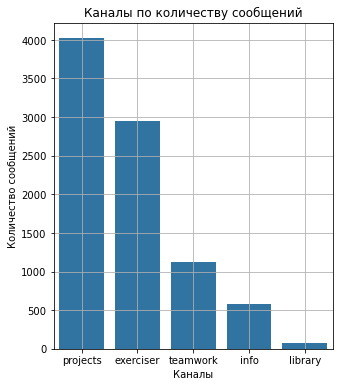

In [50]:
plot_top10(data=top_chats_by_messages, x='index', y='count',
           title='Каналы по количеству сообщений',
           xlabel='Каналы',
           ylabel='Количество сообщений',
           figsize=(5,6))

Ожидаемый порядок:
- проекты
- упражнения
- неформальное общение
- информация
- библиотека

### 4.2. Рассчитаю среднее количество сообщений на тред в каждом канале. Определю лидеров;

In [51]:
# сообщений в тредах:
threads_messages = (df[~pd.isnull(df.thread_ts)]
                   .groupby('chat')['ts']
                   .count()
                   .sort_values(ascending=False)
                   .rename('threads_messages')
                   .reset_index())
threads_messages

,chat,threads_messages
0,projects,3898
1,exerciser,2622
2,teamwork,976
3,info,494
4,library,34


In [52]:
thr_mes_stat = (threads_messages
               .merge(threads_stat, how='left', on='chat')
               .rename({'is_thread_start':'threads'}, axis=1)
               [['chat','threads','threads_messages']])

In [53]:
thr_mes_stat['ratio'] = round(thr_mes_stat['threads_messages'] / thr_mes_stat['threads'])
thr_mes_stat = thr_mes_stat.sort_values(by='ratio', ascending=False)
thr_mes_stat

,chat,threads,threads_messages,ratio
0,projects,249.0,3898,16.0
1,exerciser,372.0,2622,7.0
2,teamwork,166.0,976,6.0
3,info,77.0,494,6.0
4,library,8.0,34,4.0


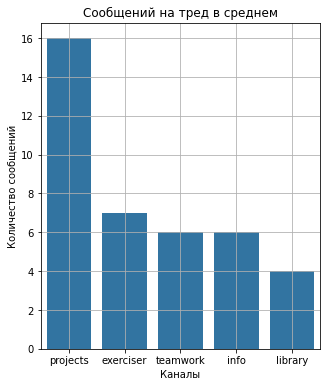

In [54]:
plot_top10(data=thr_mes_stat, x='chat', y='ratio',
           title='Сообщений на тред в среднем',
           xlabel='Каналы',
           ylabel='Количество сообщений',
           figsize=(5,6))

Проекты ожидаемо лидируют с 16 сообщениями на тред в среднем, меньше всего дополнительных вопросов задают в канале `library` - 4.

### 4.3. Исследую динамику создания сообщений в каждом из каналов.

In [55]:
df['praktikum_team'] = False
df.loc[df.real_name.isin(praktikum_team), 'praktikum_team'] = True

In [56]:
df_days_stat_full = df.groupby(['ts_days','chat','praktikum_team'])['ts'].count().reset_index().rename({'ts':'count'}, axis=1)

In [57]:
# список всех дней без пропусков
date_list = [base + datetime.timedelta(days=x) for x in range(num_days)]
date_list = pd.Series(date_list, name='date').dt.strftime('%Y-%m-%d').to_frame()
# для каждой даты добавляю наличие и отсутствие треда (cross join)
praktikum_team_df = pd.DataFrame(data=[True, False], columns=['praktikum_team'])
chats_df = pd.DataFrame(data=['projects','exerciser','teamwork','info','library'], columns=['chat'])
date_list = date_list.assign(foo=1).merge(praktikum_team_df.assign(foo=1)).drop('foo', 1)
date_list = date_list.assign(foo=1).merge(chats_df.assign(foo=1)).drop('foo', 1)
df_days_stat_full = date_list.merge(df_days_stat_full, how='left', left_on=['date', 'chat', 'praktikum_team'], right_on=['ts_days', 'chat', 'praktikum_team'])
df_days_stat_full = df_days_stat_full.sort_values(by='date', ascending=True)
# заполнение пропусков нулями для корректного отображения на графиках
df_days_stat_full['count'] = df_days_stat_full['count'].fillna(0)

In [58]:
df_days_stat_full

,date,praktikum_team,chat,ts_days,count
0,2020-08-27,True,projects,2020-08-27,3.0
1,2020-08-27,True,exerciser,2020-08-27,2.0
2,2020-08-27,True,teamwork,2020-08-27,10.0
3,2020-08-27,True,info,2020-08-27,3.0
4,2020-08-27,True,library,2020-08-27,1.0
...,...,...,...,...,...
1684,2021-02-11,True,library,NaN,0.0
1685,2021-02-11,False,projects,2021-02-11,1.0
1686,2021-02-11,False,exerciser,NaN,0.0
1687,2021-02-11,False,teamwork,2021-02-11,1.0


In [59]:
colors = sns.color_palette()

# жлетый
exerciser_dates = [('2020-08-31','2020-09-07'),
                    ('2020-09-14','2020-09-21'),
                    ('2020-09-27','2020-10-05'),
                    ('2020-10-26','2020-11-02'),
                    ('2020-11-09','2020-11-16'),
                    ('2020-11-23','2020-11-30'),
                    ('2020-12-07','2020-12-14'),
                    ('2021-01-11','2021-01-18'),
                    ('2021-01-25','2021-02-01')]

# красный
projects_dates = [('2020-09-07', '2020-09-14'),
                    ('2020-09-21', '2020-09-28'),
                    ('2020-10-05', '2020-10-12'),
                    ('2020-11-02', '2020-11-09'),
                    ('2020-11-16', '2020-11-23'),
                    ('2020-11-30', '2020-12-07'),
                    ('2020-12-14', '2020-12-21'),
                    ('2021-01-18', '2021-01-25'),
                    ('2021-02-01', '2021-02-08')]

# темно-красный
build_proj_dates = [('2020-10-12','2020-10-19'),
                    ('2020-12-21','2020-12-28')]

# зеленый
vacations_dates = [('2020-10-19', '2020-10-26'),
                    ('2020-12-28', '2021-01-11'),
                    ('2021-02-08', '2021-02-12')]

# ярко-красный
deadlines_dates = [('2020-10-25', '2020-10-26'),
                   ('2021-01-14', '2021-01-15'),
                   ('2021-02-11', '2021-02-12')]

# синий
consultations_days = [
                        ('2020-09-06', '2020-09-07'),
                        ('2020-09-14', '2020-09-15'),
                        ('2020-09-19', '2020-09-21'),
                        ('2020-09-26', '2020-09-27'),
                        ('2020-10-03', '2020-10-05'),
                        ('2020-10-10', '2020-10-11'),
                        ('2020-10-17', '2020-10-19'),
                        ('2020-10-24', '2020-10-25'),
                        ('2020-10-31', '2020-11-02'),
                        ('2020-11-08', '2020-11-09'),
                        ('2020-11-14', '2020-11-16'),
                        ('2020-11-22', '2020-11-23'),
                        ('2020-11-28', '2020-11-30'),
                        ('2020-12-05', '2020-12-06'),
                        ('2020-12-12', '2020-12-14'),
                        ('2020-12-20', '2020-12-21'),
                        ('2020-12-26', '2020-12-28'),
                        ('2021-01-17', '2021-01-18'),
                        ('2021-01-23', '2021-01-24'),
                        ('2021-01-30', '2021-01-31'),
                        ('2021-02-06', '2021-02-07')
]

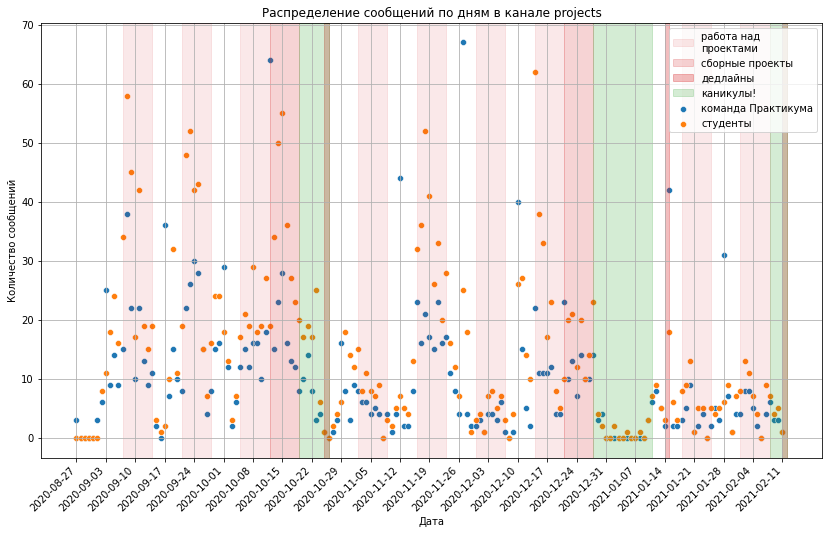

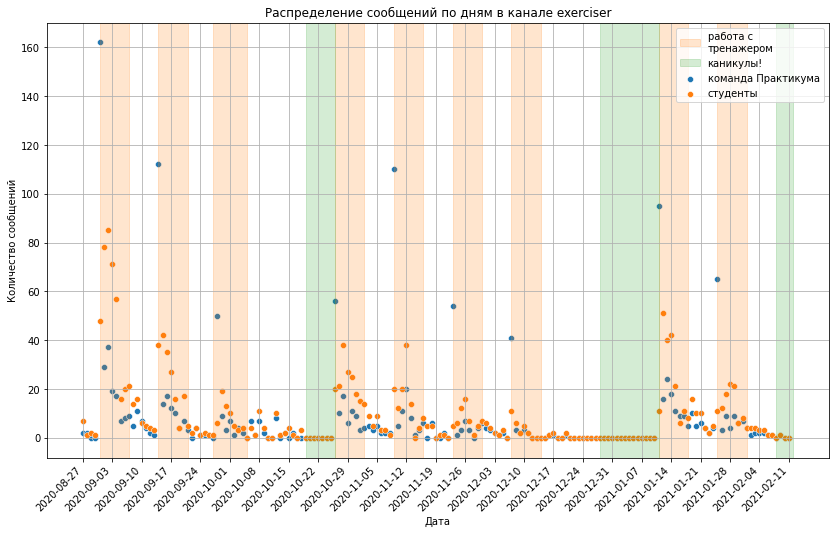

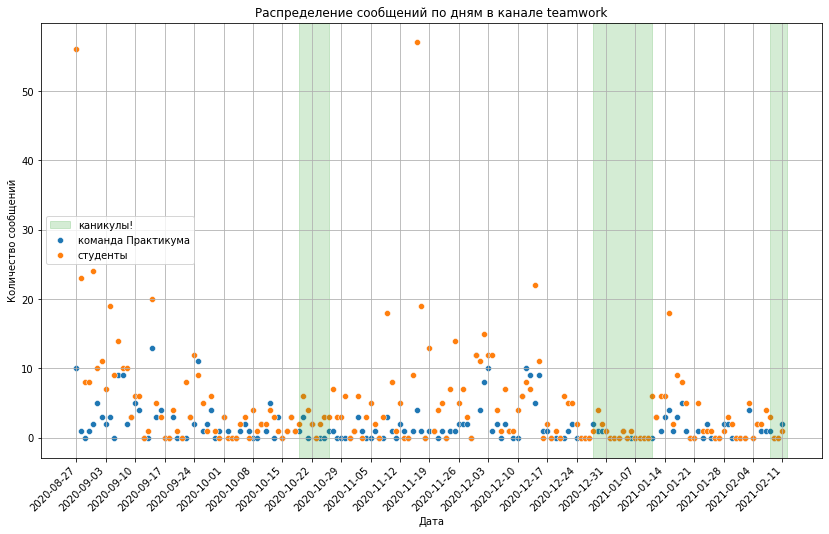

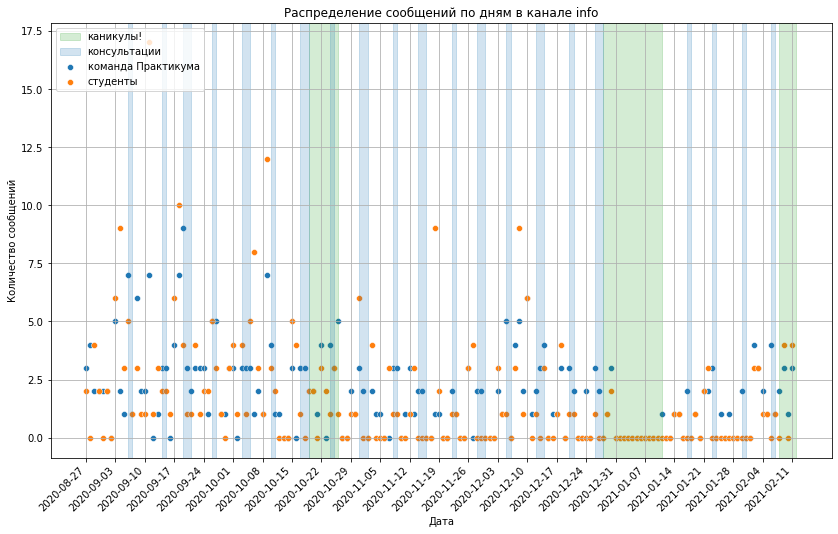

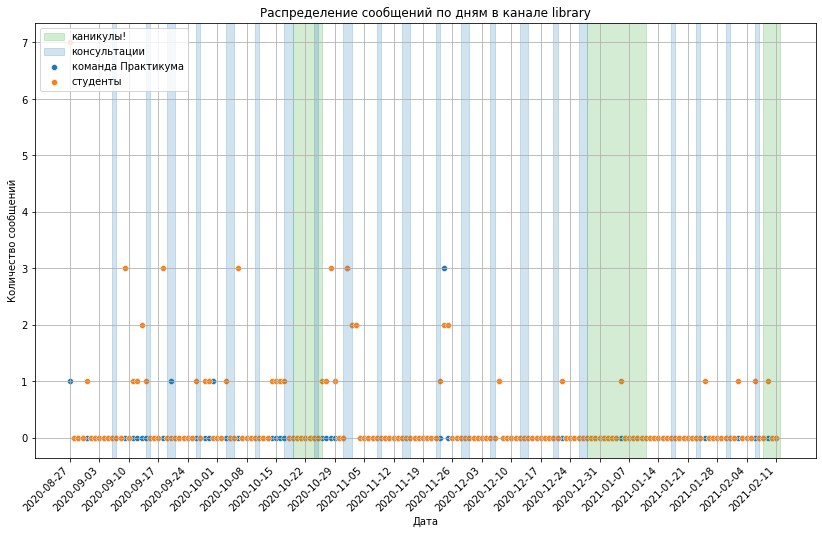

In [60]:
for i, ch in enumerate(chats_df['chat']):
    fig, ax = plt.subplots(figsize=(14,8))
    for is_praktikum_team in [True, False]:
        if is_praktikum_team:
            label = 'команда Практикума'
        else:
            label = 'студенты'
        sns.scatterplot(x='date', y='count',
                 data=df_days_stat_full[(df_days_stat_full.praktikum_team == is_praktikum_team)
                                        &(df_days_stat_full.chat == ch)],
                     label = label)
    plt.xticks(ticks=range(0, num_days, 7), rotation=45, ha='right')
    plt.title('Распределение сообщений по дням в канале ' + ch)
    plt.xlabel('Дата')
    plt.ylabel('Количество сообщений')
    if ch == 'exerciser':
#         даты работы с тренажером
        for i, (st, end) in enumerate(exerciser_dates):
            plt.axvspan(st, end, alpha=0.2, color=colors[1], label='_'*i + 'работа с\nтренажером')
    if ch == 'projects':
#         даты работы над проектами
        for i, (st, end) in enumerate(projects_dates):
            plt.axvspan(st, end, alpha=0.1, color=colors[3], label ='_'*i + 'работа над\nпроектами')
        for i, (st, end) in enumerate(build_proj_dates):
            plt.axvspan(st, end, alpha=0.2, color=colors[3], label ='_'*i + 'сборные проекты')
        for i, (st, end) in enumerate(deadlines_dates):
            plt.axvspan(st, end, alpha=0.3, color=colors[3], label = '_'*i + 'дедлайны')

        # каникулы
    for i, (st, end) in enumerate(vacations_dates):
        plt.axvspan(st, end, alpha=0.2, color=colors[2], label = '_'*i + 'каникулы!')
    if ch == 'library' or ch == 'info':
#         консультации
        for i, (st, end) in enumerate(consultations_days):
            plt.axvspan(st, end, alpha=0.2, color=colors[0], label = '_'*i + 'консультации')
    plt.legend()
    plt.grid()
    plt.show()

Как видно, в периоды сдачи проектов в целом наблюдается б**о**льшая активность в каналах `проектов`. Студенты здесь более активны преподавателей, возможно, повторяются с вопросами или помогают друг другу, отвечая вместо преподавателей.
На некоторые проекты активность в целом выше, а другие не вызывают таких сложностей ("Сбор и хранение данных" и "Принятие решений в бизнесе на основе данных"). Соглашусь со статистикой, мне тоже так показалось.  
Команда Практикума редко совсем отдыхала - только в первые несколько дней, пока не были сданы первые упражнения, и в новогодние праздники. В канале `упражнений` команда отдыхала больше - редко у кого возникали вопросы по ним на этапе проектов и тем более каникул.  
В канале `для общения` активность не утихала даже в каникулы, видна активность даже от команды Практикума перед НГ - и это в их стиле - всегда щедры на похвалу и поздравления)).  
В канале `info` активность от студентов чуть выше в дни консультаций и перед ними. Это логично, т.к. основные посты в этом канале от студентов касаются вопросов на консультации.  
В `библиотеке` - что называется "редко, но метко" - не более 4 сообщений в день, в основном от студентов, здесь команда Практикума немного пожадничала, непохоже на них).

### 5. Общий вывод

#### Подготовка данных:

Я загрузил данные из предоставленных файлов, данные в целом корректны, пришлось лишь перевести время создания сообщения и треда в нужный временной формат и учесть часовой пояс (UTC+3).

#### Исследование пользователей (не считая команду Практикума):

Максим Мандрик - явный лидер по количеству сообщений, у него в сумме 250 сообщений, у следующего лидера уже меньше 180 (большой разрыв!)

Наибольшее количество вопросов у студентов возникало по самостоятельным проектам. Предсказуемый результат.

По количеству начатых тредов лидирует `Ekaterina`, с **почти двухкратным отрывом** от других пользователей с 21 начатым тредом.

#### Исследование сообщений:

При анализе количества сообщений по дням без разделения на каналы трудно найти какие-то закономерности. Количество сообщений совершенно нелинейно, много случайных факторов. Кроме новогодних праздников, когда активность закономерно приблизилась к нулю - отдыхать все хотят).
Кроме того, видно, что самое большое количество новых тредов было создано за первые 2 недели (причём не сразу со старта, время на "раскачку" естественно). Это можно объяснить поначалу непривычным для многих использованием тредов - в мессенджерах такого нет, но в этом и преимущество слака.

Больше всего сообщений собрали треды от Валерии Проничевой и Артёма Рябцева в канале `проекты`.

Больше всего тредов создавалось в канале `учебных заданий`. Треды создавались по каждому пункту упражнений, коих было немало, гораздо больше, чем в проектах. Потом идёт канал неформального общения, видимо, студенты находили там для себя много интересных тем для обсуждения. Меньше всего тредов в библиотеке - в основном там оставляли реакции в виде смайлов.

Треды во всех каналах, кроме проектных, имеют довольно ровную гистограмму распределения по количеству сообщений в тредах.
Канал "Проекты" же, в отличие ото всех других - имеет самое большое количество сообщений и отдельные треды, которые идут далеко впереди по числу сообщений. Похоже, там шли жаркие дискуссии по непростым задачам, подогреваемыми близкими дедлайнами.

Чем раньше создавался тред, тем больше среди них было тредов с относительно большим количеством сообщений, и чем позже - тем меньше. Но по среднему они практически не отличались.

В канале `teamwork` встречаются наиболее длинные сообщения - более чем в 2 раза превышающие сообщения в других каналах. Всё верно, "коротко и по существу" нужно писать в других каналах, тут можно расслабиться.
Однако `проекты` всё равно лидируют по медианной длине сообщения. Чтобы тебя поняли, приходится описывать всё подробно - правила хорошего тона никуда не делись.

Самые длинные сообщения - приветствия. Но почему-то трое лидеров по длине сообщений (Николь Морозова, Кирилл Зайков, Даниил Костарев) на этом и ограничились...

#### Исследование каналов:

По количеству сообщений:
Ожидаемый порядок (начиная с самого популярного):
- проекты
- упражнения
- неформальное общение
- информация
- библиотека

Проекты ожидаемо лидируют с 16 сообщениями на тред в среднем, меньше всего дополнительных вопросов задают в канале `library` - 4.

Как видно, в периоды сдачи проектов в целом наблюдается б**о**льшая активность в каналах `проектов`. Студенты здесь более активны преподавателей, возможно, повторяются с вопросами или помогают друг другу, отвечая вместо преподавателей.
На некоторые проекты активность в целом выше, а другие не вызывают таких сложностей ("Сбор и хранение данных" и "Принятие решений в бизнесе на основе данных"). Соглашусь со статистикой, мне тоже так показалось.  
Команда Практикума редко совсем отдыхала - только в первые несколько дней, пока не были сданы первые упражнения, и в новогодние праздники. В канале `упражнений` команда отдыхала больше - редко у кого возникали вопросы по ним на этапе проектов и тем более каникул.  
В канале `для общения` активность не утихала даже в каникулы, видна активность даже от команды Практикума перед НГ - и это в их стиле - всегда щедры на похвалу и поздравления)).  
В канале `info` активность от студентов чуть выше в дни консультаций и перед ними. Это логично, т.к. основные посты в этом канале от студентов касаются вопросов на консультации.  
В `библиотеке` - что называется "редко, но метко" - не более 4 сообщений в день, в основном от студентов, здесь команда Практикума немного пожадничала, непохоже на них).